In [1]:
import sys

In [2]:
sys.path.insert(0,'../')

In [3]:
import pyathena as pa

[stellar-intel.princeton.edu:2703461] mca_base_component_repository_open: unable to open mca_op_avx: /usr/local/openmpi/4.1.0/gcc/lib64/openmpi/mca_op_avx.so: undefined symbol: ompi_op_base_module_t_class (ignored)


In [4]:
s = pa.LoadSimTIGRESSNCR('/scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0',verbose=True)

[LoadSimTIGRESSNCR-INFO] savdir : /scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
[LoadSimTIGRESSNCR-INFO] basedir: /scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
[LoadSimTIGRESSNCR-INFO] athinput: /scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0/out.txt
[LoadSimTIGRESSNCR-INFO] athena simulation
[LoadSimTIGRESSNCR-INFO] problem_id: R8_8pc_NCR


[LoadSimTIGRESSNCR-INFO] timeit: /scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0/timeit.txt
[LoadSimTIGRESSNCR-INFO] hst: /scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0/hst/R8_8pc_NCR.hst
[LoadSimTIGRESSNCR-INFO] vtk in tar: /scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0/vtk nums: 200-389
[LoadSimTIGRESSNCR-INFO] starpar_vtk: /scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0/starpar nums: 200-389
[LoadSimTIGRESSNCR-INFO] zprof: /scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0/zprof nums: 200-389
[LoadSimTIGRESSNCR-WARNING] rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR-phigas/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.


In [7]:
ds = s.load_vtk(s.nums[-1])

[LoadSimTIGRESSNCR-INFO] [load_vtk_tar]: R8_8pc_NCR.0389.tar. Time: 389.000900


In [8]:
ds.field_list

['density',
 'velocity',
 'pressure',
 'cell_centered_B',
 'gravitational_potential',
 'gas_gravitational_potential',
 'temperature',
 'heat_rate',
 'cool_rate',
 'net_cool_rate',
 'CR_ionization_rate',
 'rad_energy_density_PH',
 'rad_energy_density_LW',
 'rad_energy_density_PE',
 'rad_energy_density_PE_unatt',
 'rad_energy_density_LW_diss',
 'specific_scalar[0]',
 'specific_scalar[1]',
 'xHI',
 'xH2',
 'xe']

In [9]:
data = ds.get_field(field=['gravitational_potential','gas_gravitational_potential'])

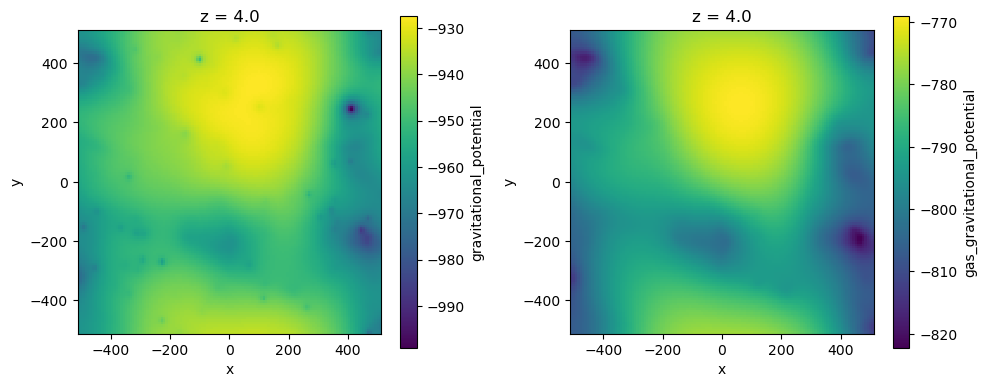

In [13]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
for ax,f in zip(axes,data):
    plt.sca(ax)
    data[f].sel(z=0,method='nearest').plot()
    ax.set_aspect("equal")
plt.tight_layout()

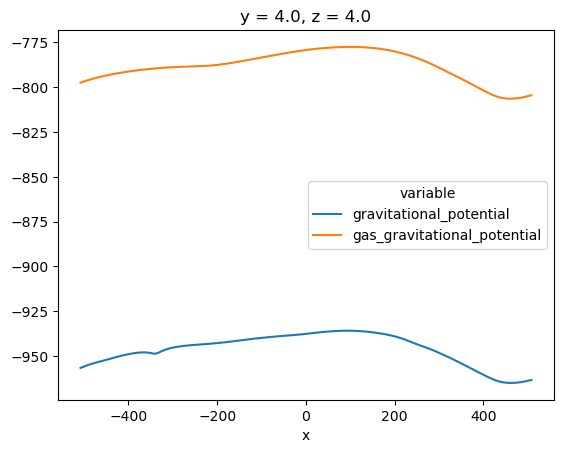

In [23]:
data.to_array().sel(z=0,y=0,method='nearest').plot(hue='variable')

In [14]:
from pyathena.util.derivative import gradient

In [20]:
gx,gy,gz = gradient(data["gravitational_potential"].data,
                    data.x.data,data.y.data,data.z.data)
gx_g,gy_g,gz_g = gradient(data["gas_gravitational_potential"].data,
                    data.x.data,data.y.data,data.z.data)

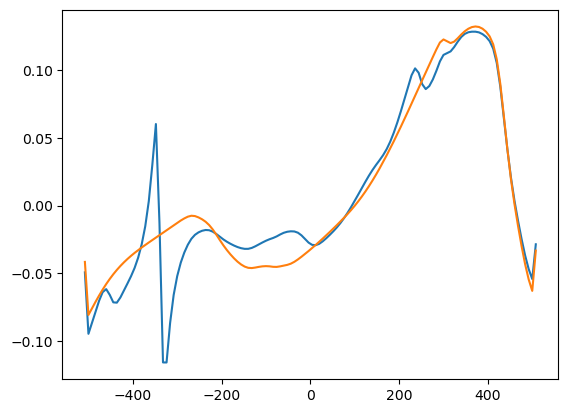

In [21]:
plt.plot(data.x,gx[384,64,:])
plt.plot(data.x,gx_g[384,64,:])